In [50]:
import pandas as pd


In [5]:
ev_data=pd.read_csv(r"C:\Users\HARSHIT SHARMA\Desktop\Python\Python Project_1\Electric_Vehicle_Population_Data.csv")
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [51]:
ev_data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [8]:
ev_data = ev_data.dropna()

In [9]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

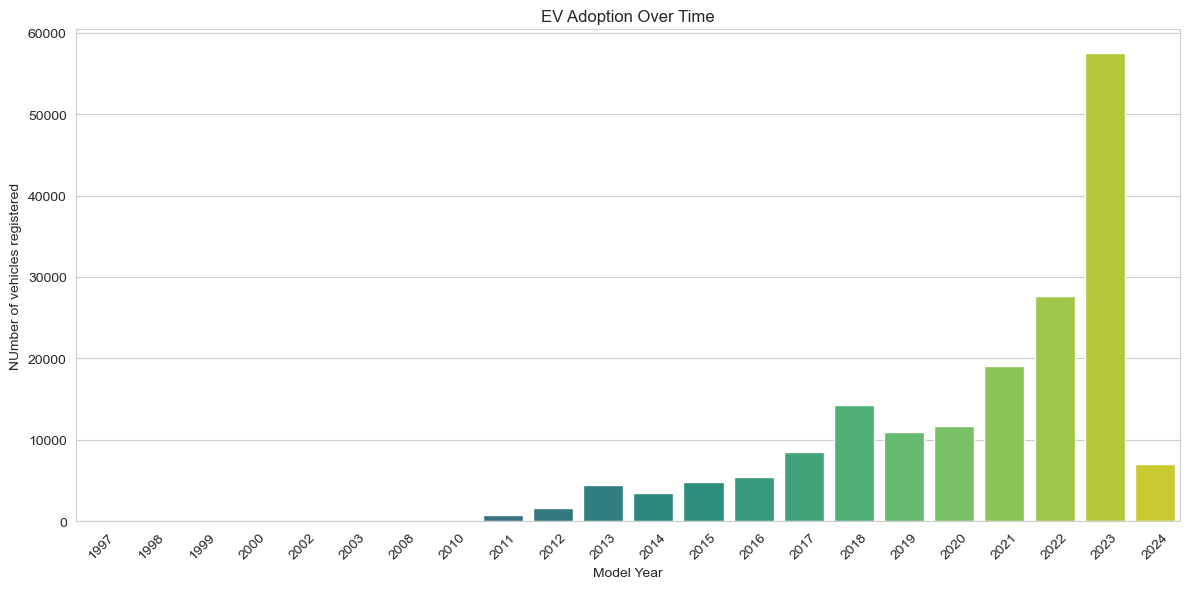

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#EV adoption over time
plt.figure(figsize=(12,6))
ev_adoption_by_year =ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette = 'viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('NUmber of vehicles registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
            

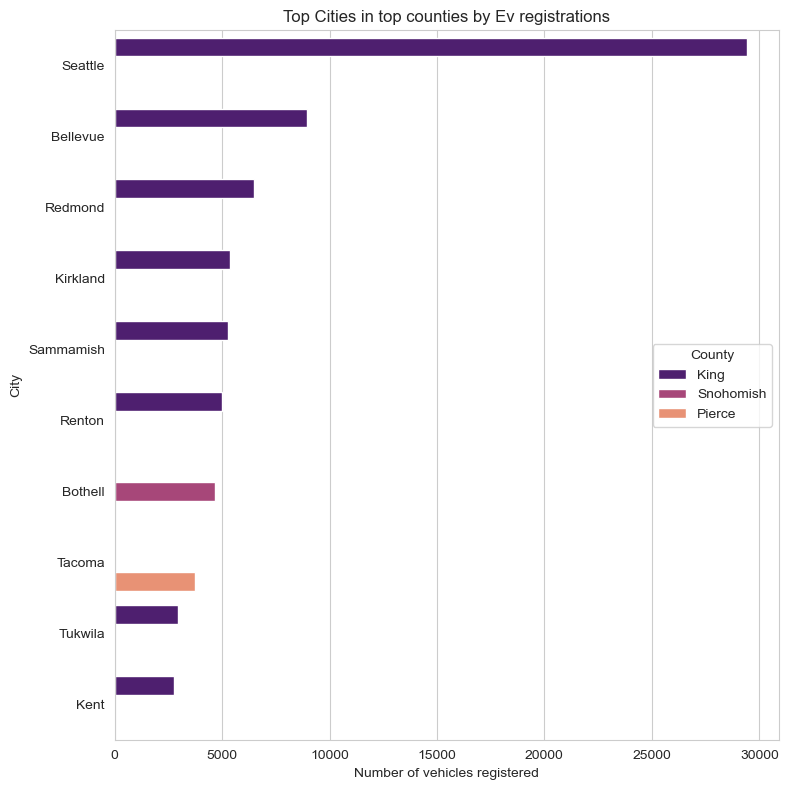

In [80]:
# Geographical distribution at county level

ev_country_distribution = ev_data['County'].value_counts()
top_countries = ev_country_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data [ev_data['County'].isin(top_countries)]

#analyzing the distribution of Ev's within the cities of these top counties
ev_distribution_city_wise_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#visualize the top 10 cities across these counties
top_cities = ev_distribution_city_wise_top_counties.head(10) 

plt.figure(figsize=(8,8))
sns.barplot(x='Number of Vehicles' ,y='City', hue='County', data =top_cities, palette='magma')
plt.title('Top Cities in top counties by Ev registrations')
plt.xlabel('Number of vehicles registered')
plt.ylabel('City')
plt.legend(title='County',loc='center right')
plt.tight_layout()
plt.show()

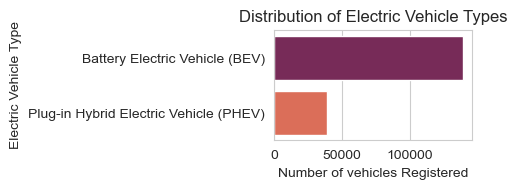

In [26]:
# analyzing the distribution of electric vehicle types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(5,2))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,palette ='rocket')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

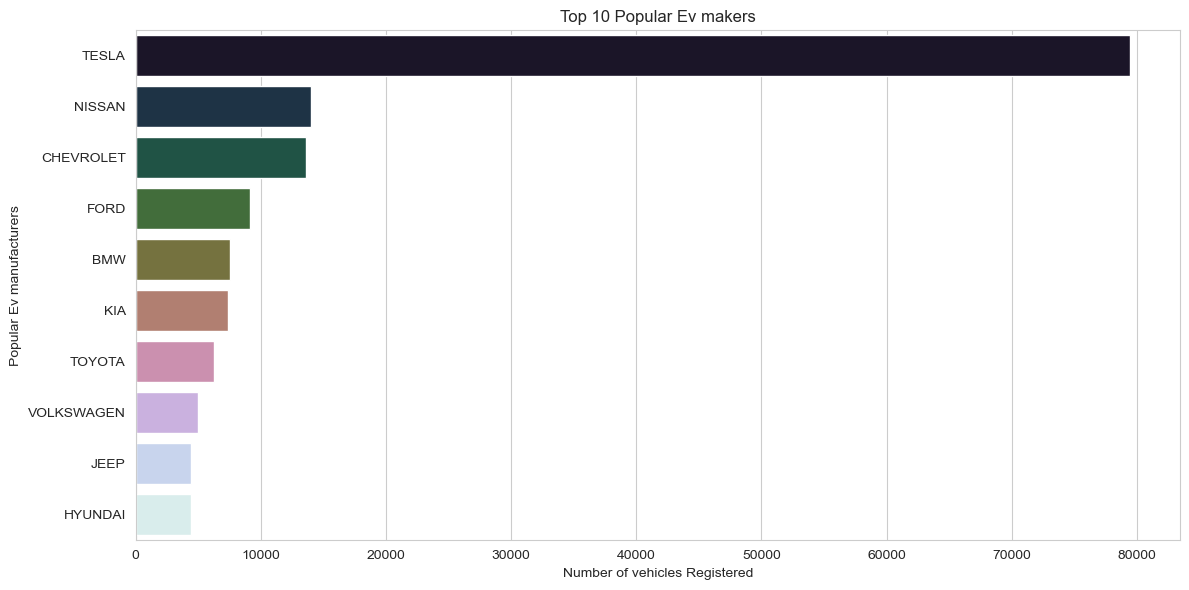

In [27]:
#analyzing the popularity of Ev manufacturers

ev_make_distribution =ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values , y=ev_make_distribution.index , palette ='cubehelix')
plt.title('Top 10 Popular Ev makers')
plt.xlabel('Number of vehicles Registered')
plt.ylabel('Popular Ev manufacturers')
plt.tight_layout()
plt.show()


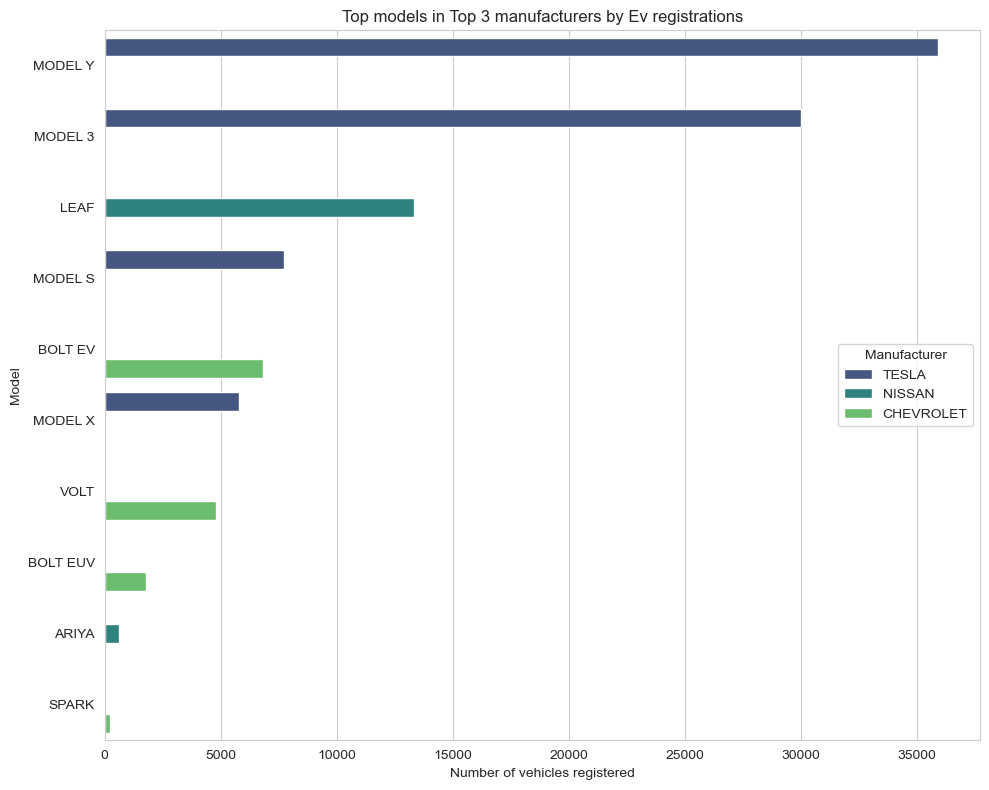

In [39]:
# selecting top 3 manufacturers based on the number of vehicles registered

top_3_manufacturers =ev_make_distribution.head(3).index

#filtering the data set for these top 3 manufacturers

top_manufacturers_data = ev_data[ev_data['Make'].isin(top_3_manufacturers)]

#analyzing the popularity of ev_models within these top_manufacturers

ev_models_within_these_top_manufacturers = top_manufacturers_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#visualizing the top 10 models across these manufacturers for clarity

top_models=ev_models_within_these_top_manufacturers.head(10)

plt.figure(figsize=(10,8))
sns.barplot(x ='Number of Vehicles',y='Model', hue='Make',data=top_models, palette='viridis')
plt.title('Top models in Top 3 manufacturers by Ev registrations')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Model')
plt.legend(title='Manufacturer'  ,loc ='center right')
plt.tight_layout()
plt.show()

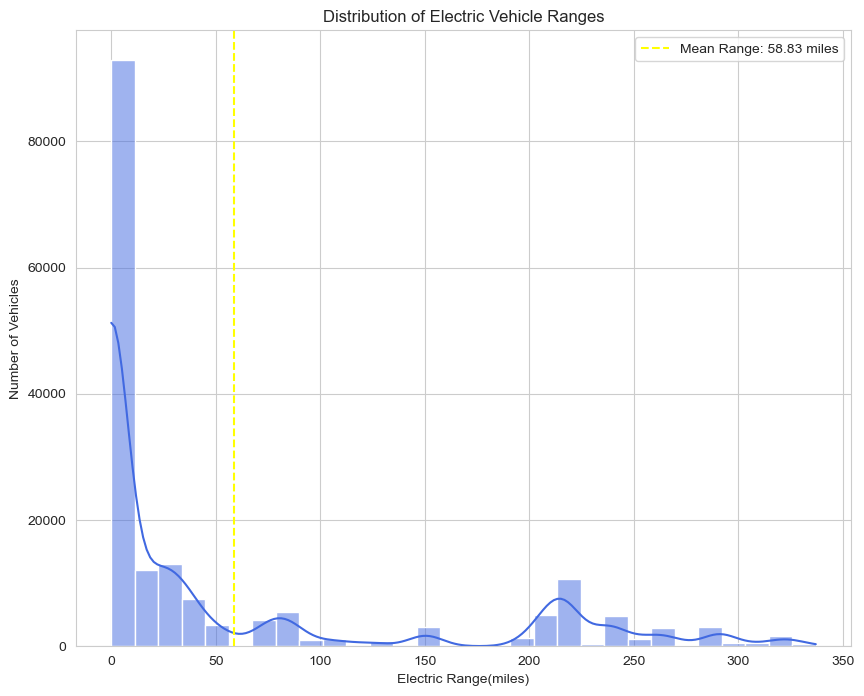

In [59]:
# analyzing the distribution of electric range 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(10,8))
sns.histplot(ev_data['Electric Range'],bins=30 , kde='True', color ='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range(miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(),color ='Yellow',linestyle='--' , label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()


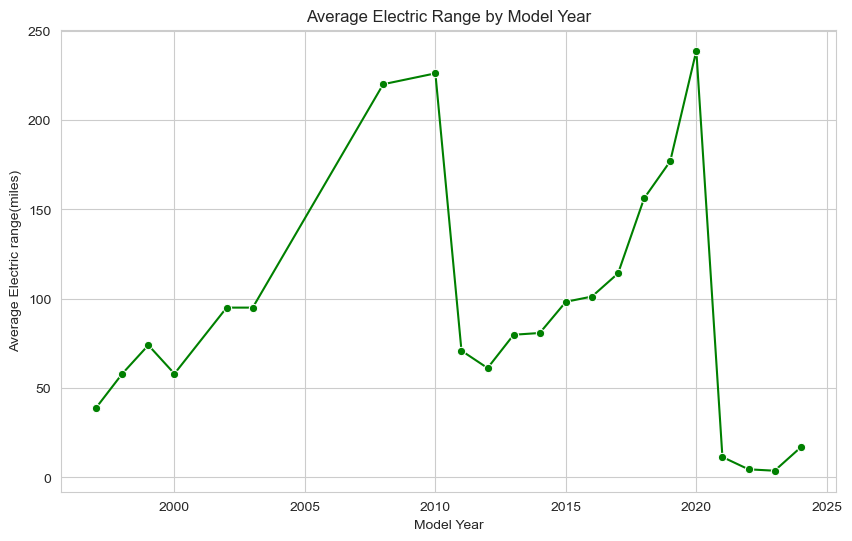

In [67]:
#calculating the average electric range by model year

average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Model Year',y='Electric Range',data = average_range_by_year, marker='o',color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric range(miles)')
plt.grid(True)
plt.show()

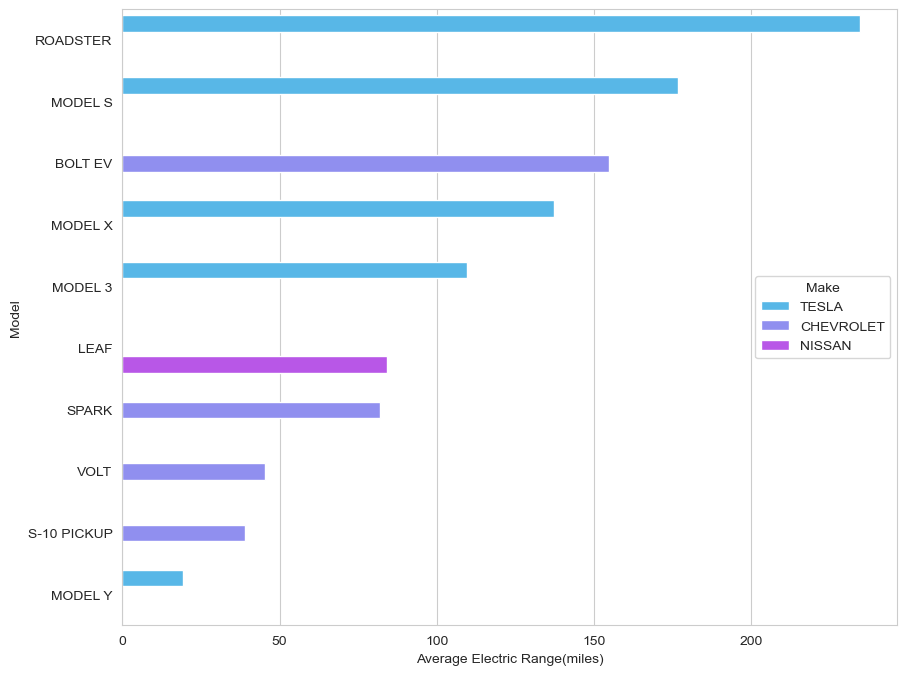

In [82]:
average_range_by_model = top_manufacturers_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

#Top 10 models with highest average electric range
top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='Electric Range' , y = 'Model' ,hue='Make',data= top_range_models,palette = 'cool')
plt.xlabel('Average Electric Range(miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.show()

In [83]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [84]:
#calculate compound annual growth rate

from scipy.optimize import curve_fit
import numpy as np

# As we have data till march 2024,so to show a trend we will take complete data till 2023 and check trend for next 5 model years
filtered_years = ev_registration_counts[ev_registration_counts.index<=2023]

#defining a function for an exponential growth to fit the data
def exp_growth(x,a,b):
    return a*np.exp(b*x)

# preparing the data for curve fitting
x_data=filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

#fit the data to the exponential growth function
params,covariance=curve_fit(exp_growth,x_data,y_data)

#use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years =np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# creating a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


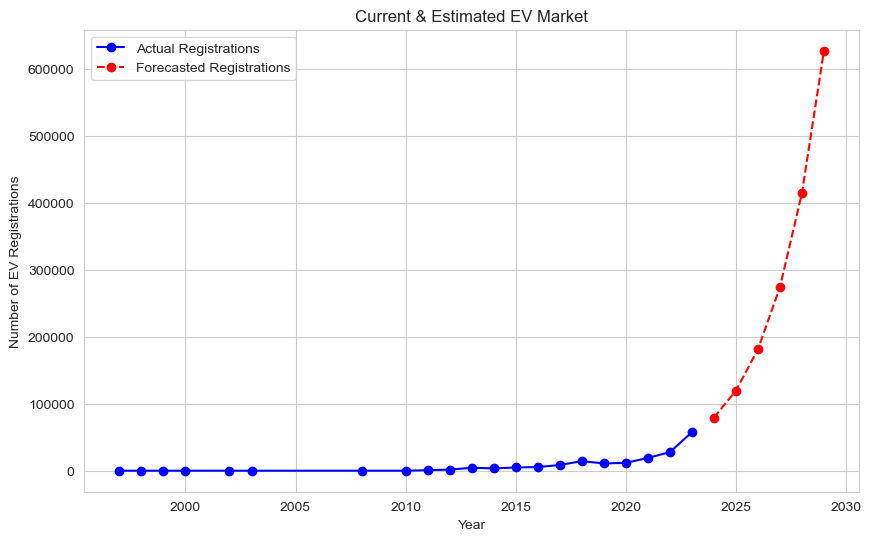

In [89]:
# preparing the data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(10,6))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()